# StackOverflow 2018 Survey



## Overview  

This analysis attempts to provide insights for individuals who have a Ph.D. in a field other than Computer Science who are interested in transitioning to a computing-centric field. Important tools, career paths, and factors influencing success (as measured by salary) are extracted from a StackOverflow survey dataset from 2018. The workflow is intended to loosely follow the Cross-Industry Process for Data Mining model (CRISP-DM), which entails (i) establishing a business understanding of the task at hand, (ii) understanding the data, (iii), preparing the data, (iv) modeling, (v) evaluating the model, and, finally, (vi) deploying the results. 

## Business Understanding  

All too commonly, students who pursue a Ph.D. and then decide to transition to industry find it challenging to procure a position that is both highly satisfying and well-paying. Based on personal stories from friends and acquaintances, I assume that career frustration is particularly likely for those who study the fine arts, the humanities, or even a natural science. Compared to those who study a field in high demand, such as Computer Science, the path to a satisfying career can be daunting.  

Many find that they need to take concrete steps to adapt their analytical skills for industry needs. This includes learning modern data analysis tools, *e.g.*, statistical software, one or more computer programming languages, machine learning, *etc*. For PhDs who decide to 'up-skill' and make a career transition, several questions seem particularly relevant:

1. How prevelant are non-Computer Science PhDs in computing-centric fields?
2. What are the top job prospects for this demographic?
3. Which tools are the most important to learn?
4. Is the lack of a Computer Science degree a significant detriment for Ph.D.s?

## Data Understanding  



To answer the above questions, I used data from the StackOverflow developer survey from 2018. Throughout this analysis, I made at least one major assumption (which was most certainly inaccurate): I assumed that the survey results were a representative sample from the population of all the world's developers. The data exploration below eventually revealed certain biases in the data, but the assumption seemed reasonable for the sake of finding approximate answers. 

To begin the analysis, I started by importing necessary libraries.

In [2]:
# Import relevant objects from the standard library
from   collections import Counter
from   pathlib import Path
from   pprint import pprint

# Import needed third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Adjust settings so matplotlib graphs show in the notebook
%matplotlib inline

The data from StackOverflow came as two distinct files - one containing the survey results, and a second containing the schema to interpret the survey data. I loaded the survey results into a pandas dataframe.

In [3]:
csv_path = Path("../data/survey_results_public.csv")
df = pd.read_csv(csv_path, low_memory=False)

Typically, I begin by checking what features are available, what the data types are, and how many records are included. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


Because so many features were included, I found it easier to inspect the schema csv file to become familiar with the features. Nearly 100k records were available.  

The first feature I investigated was the Formal Education field, which indicated the highest level of education attained by each respondent. I needed to define a helper function first that would enhance the visualization of the data.

In [24]:
def add_bar_values(ax, space=0.1):
    """Show numeric values for each category in a barchart
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to be labeled with numeric values
    
    space : float
        Distance to put between bar and numeric label
    """
    
    for p in ax.patches:
        x = p.get_x() + p.get_width() + float(space)
        y = p.get_y() + p.get_height()
        value = int(p.get_width())
        ax.text(x, y, value, ha='left', va='bottom')

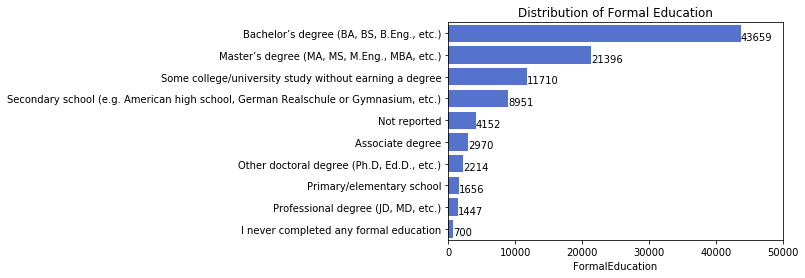

In [30]:
degree_breakdown = df.FormalEducation.fillna('Not reported').value_counts()
fig1 = sns.barplot(x=degree_breakdown, y=degree_breakdown.index, color='royalblue')
add_bar_values(fig1)
plt.xlim(0, 50000)
plt.title("Distribution of Formal Education")
plt.show()

Bachelor's and Master's students dominated the distribution. The survey did not distinguish between the various 'flavors' of doctoral degrees other than to separate out M.D.'s and J.D.'s from all others. For simplicity, I referred to the 'Other doctoral degree' segment as simply Ph.D.'s for the remainder of the analysis. A total of 2214 respondents indicated that they attained this level of education.  

Next, I broke down the Undergrad Major features to get a sense of what fields were studied by the respondents.

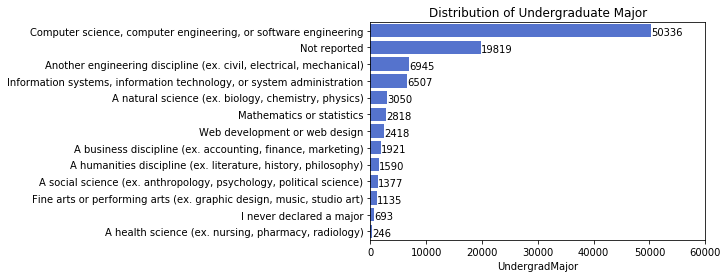

In [31]:
undergrad_breakdown = df.UndergradMajor.fillna('Not reported').value_counts()
fig2 = sns.barplot(x=undergrad_breakdown, y=undergrad_breakdown.index, color='royalblue')
add_bar_values(fig2)
plt.xlim(0, 60000)
plt.title('Distribution of Undergraduate Major')
plt.show()

The category "Computer science, computer engineering, or software engineering" was by far the most prevelant field. Other STEM fields represented most of the other categories --  although business, the humanities, social science, health care, and the fine arts were also represented.

Next, I created a similar breakdown, only filtering this time for respondents that had earned a Ph.D.

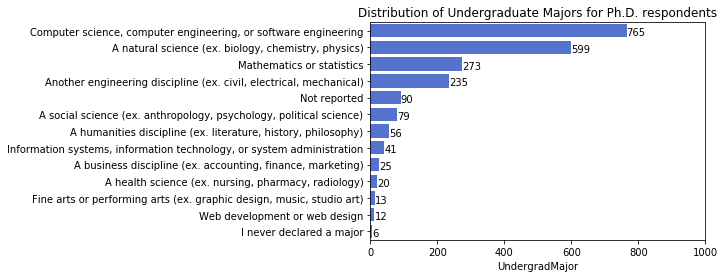

In [34]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
phd_field_breakdown = df.UndergradMajor.fillna('Not reported')[is_phd].value_counts()
fig3 = sns.barplot(x=phd_field_breakdown, y=phd_field_breakdown.index, color='royalblue')
add_bar_values(fig3)
plt.xlim(0, 1000)
plt.title('Distribution of Undergraduate Majors for Ph.D. respondents')
plt.show()

Making the assumption that all Ph.D. students studied the same field in both their undergraduate and graduate studies, I was able to calculate the percentage of the respondents that achieved a Ph.D., but decided not to study Computer Science.

In [37]:
is_compsci = df.UndergradMajor.fillna('Not reported').str.contains('Computer science')
total_n = len(df)
num_phd = sum(is_phd)
num_not_compsci = sum(~is_compsci)
num_both = len(df[is_phd & ~is_compsci])
fraction_phd = num_phd / total_n
fraction_not_compsci = num_not_compsci / total_n
fraction_both = num_both / total_n

print(f"Total respondents: {total_n}\n")
print(f"Number of respondents without computer science undergrad degree: {num_not_compsci}")
print(f"Number of respondents with PhD: {num_phd}")
print(f"Number of respondents without compsci degree, but with PhD: {num_like_me}\n")
print(f"Fraction of respondents without computer science undergrad degree: {fraction_not_compsci:.3f}")
print(f"Fraction of respondents with PhD: {fraction_phd:.3f}")
print(f"Fraction of respondents with both conditions: {fraction_both:.3f}")


Total respondents: 98855

Number of respondents without computer science undergrad degree: 48519
Number of respondents with PhD: 2214
Number of respondents without compsci degree, but with PhD: 1449

Fraction of respondents without computer science undergrad degree: 0.491
Fraction of respondents with PhD: 0.022
Fraction of respondents with both conditions: 0.015


Only 1.5% of the respondents fit the above description.

To answer the more specific question of "How prevalent are non-compsci Ph.D.'s in computing-centric fields", I needed to determine how many of the respondents were employed as a developer.

In [50]:
df.Employment.unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

In [60]:
is_employed = df.Employment.isin([
    'Employed part-time', 
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed',
])

I also needed to inspect the types of jobs represented in the survey. The survey allowed respondents to indicate multiple developer types for their current employment, so I aggregated the number of times each category was chosen.

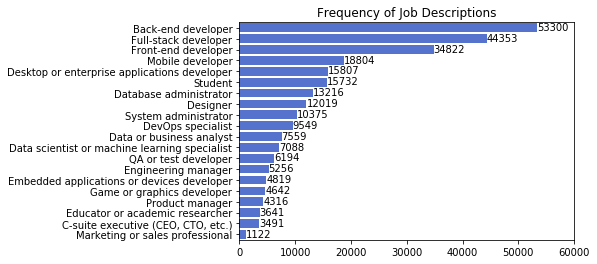

In [58]:
dev_list = list()
for answer in df.DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            dev_list.append(item)
dev_counts = Counter(dev_list)

dev_df = pd.Series(dict(dev_counts))
dev_df = dev_df.sort_values(ascending=False)
fig4 = sns.barplot(x=dev_df, y=dev_df.index, color='royalblue')
add_bar_values(fig4)
plt.title("Frequency of Job Descriptions")
plt.xlim(0, 60000)
plt.show()

Most of the job types could be classified as "computer-centric", so I made the approximation that all employed respondents were in some way involved in a computer centric position. Question 1 could then be addressed as follows:

In [71]:
total_employed = sum(is_employed)
target_demographic = sum(is_employed & is_phd & ~is_compsci)
question_1_ans = target_demographic / total_employed

print(f"Total number of employed respondents: {total_employed}")
print(f"Total number of non-compsci Ph.D.s employed in a computer centric job: {target_demographic}")
print(f"The total fraction of non-compsci Ph.D.s employed in a computer-centric job was: {question_1_ans:.3f}")

Total number of employed respondents: 85157
Total number of non-compsci Ph.D.s employed in a computer centric job: 1357
The total fraction of non-compsci Ph.D.s employed in a computer-centric job was: 0.016


>**Question 1:** How prevelant are non-Computer Science Ph.D.s in computing-centric fields?  
**Answer:** Not very. In the StackOverflow survey, 1.6% of employees in a computer-centric job indicated that they were non-Computer Science Ph.D.s

To double check the above assumption, I tabulated the number of times each category of developer type was chosen by a non-Computer Science Ph.D., and the assumption seemed to hold.

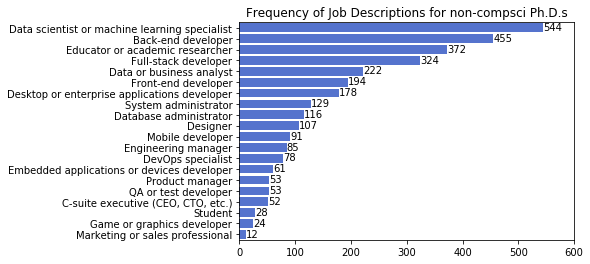

In [72]:
phd_dev_list = list()
for answer in df[is_phd & ~is_compsci & is_employed].DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            phd_dev_list.append(item)
phd_dev_counts = Counter(phd_dev_list)

phd_dev_df = pd.Series(dict(phd_dev_counts))
phd_dev_df = phd_dev_df.sort_values(ascending=False)
fig5 = sns.barplot(x=phd_dev_df, y=phd_dev_df.index, color='royalblue')
add_bar_values(fig5)
plt.title("Frequency of Job Descriptions for non-compsci Ph.D.s")
plt.xlim(0, 600)
plt.show()

The above graph also helped to answer my next question:

>**Question 2:** What are the top computing-centric job prospects for Non-Computer Science Ph.D.'s?  
**Answer:** The top three jobs for Non-Computer Science Ph.D.'s in the StackOverflow dataset include (1) Data scientist or machine learning specialist, (2) Back-end developer, and (3) Educator or academic researcher.

If a person were to transition to a computing-centric field, a good start would be to decipher which tools of the trade are most popular. I chose several features in the dataset that revolved around developer tools, wrote a function to summarize the features, and displayed the results below.

In [120]:
tool_features = (
    'LanguageWorkedWith', 
    'DatabaseWorkedWith', 
    'PlatformWorkedWith', 
    'FrameworkWorkedWith', 
    'IDE', 
    'VersionControl',
)

phd_tools = df.loc[is_phd & ~is_compsci & is_employed, tool_features]

In [121]:
def graph_most_used(df, col):
    """Plot a Pareto-style chart for a categorical features in a dataframe
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe with features to be summarized
    col : str
        The name of the categorical column to be summarized with a 
        Pareto-style graph
    """
    
    agg_list = list()
    for response in df[col]:
        if response is not np.nan:
            for item in response.split(';'):
                agg_list.append(item)
    counter = Counter(agg_list)
    
    counter_df = pd.Series(dict(counter))
    counter_df = counter_df.sort_values(ascending=False)
    sns.barplot(x=counter_df, y=counter_df.index, color='royalblue')
    plt.title(col)
    plt.xlabel('Frequency')
    plt.show()

>**Question 3:** Which tools are the most important to learn?  
**Answer:** The graphs below indicate which tools were most popular amongst non-Computer Science Ph.D.'s with a job.  

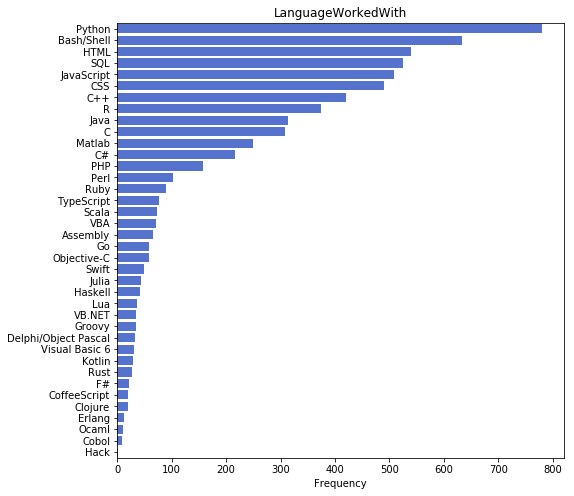

In [113]:
plt.figure(figsize=(8, 8))
graph_most_used(phd_tools, 'LanguageWorkedWith')

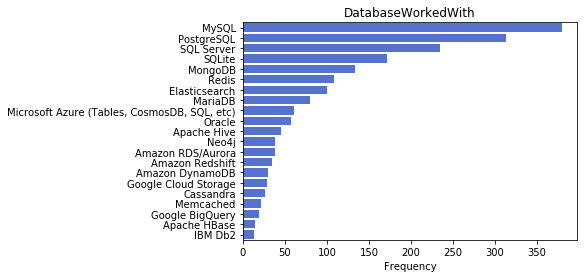

In [114]:
graph_most_used(phd_tools, 'DatabaseWorkedWith')

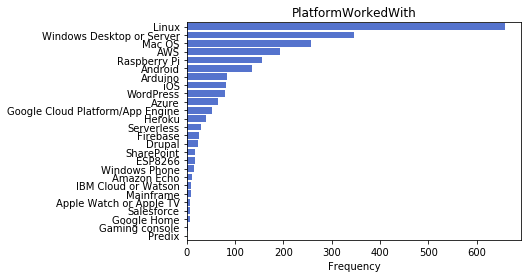

In [115]:
graph_most_used(phd_tools, 'PlatformWorkedWith')

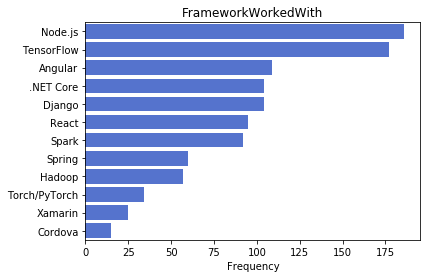

In [116]:
graph_most_used(phd_tools, 'FrameworkWorkedWith')

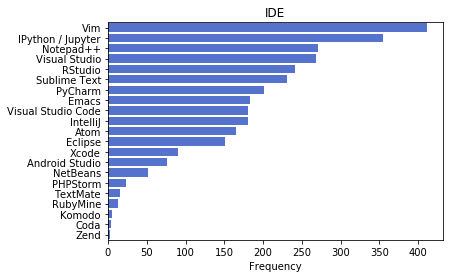

In [117]:
graph_most_used(phd_tools, 'IDE')

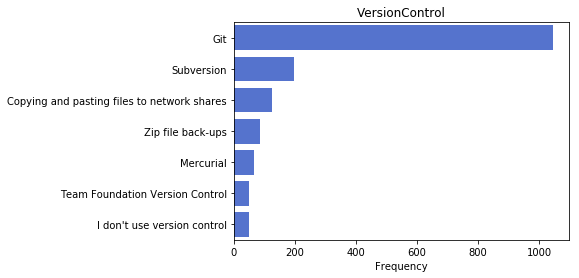

In [118]:
graph_most_used(phd_tools, 'VersionControl')

To summarize, Python was the most popular language to work with. Bash/Shell, HTML, and SQL were also widely used. Relational databases appeared to be more widespread than others. Linux was used about twice as much as Windows, although Windows was used more commonly than MacOS. Node.Js appeared to be the most popular web framework, while TensorFlow dominated the AI frameworks. Most of this demograhic had experience with Vim and Jupyter notebooks, and finally, Git was by far the most common version control software used.

To answer my final question, "Is the lack of a Computer Science degree a significant detriment for Ph.D.s?", I needed a two-part approach. I wanted to answer this question in terms of job satisfaction and also in terms of salary. Are non-Computer Science Ph.D.'s happy with their jobs? How critical is the Computer Science degree in determining salary?  

For the first question, I plotted the distribution of job satisfaction for each job category, sorted for non-Computer Science Ph.D. respondents with jobs. I started by filtering and inspecting the JobSatisfaction feature.

In [124]:
phd_satisfaction_df = df.loc[is_phd & ~is_compsci & is_employed, ('JobSatisfaction', 'DevType')]

In [125]:
phd_satisfaction_df.JobSatisfaction.unique()

array(['Slightly satisfied', 'Extremely satisfied',
       'Slightly dissatisfied', 'Moderately satisfied', nan,
       'Moderately dissatisfied', 'Neither satisfied nor dissatisfied',
       'Extremely dissatisfied'], dtype=object)

I then assigned an ordinal numeric value to each category in JobSatisfaction.

In [126]:
satisfaction_mapping = {
    'Extremely dissatisfied': 0,
    'Moderately dissatisfied': 1,
    'Slightly dissatisfied': 2, 
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4, 
    'Moderately satisfied': 5, 
    'Extremely satisfied': 6,
    np.nan: np.nan,
}

phd_satisfaction_df['JobSatisfactionOrd'] = phd_satisfaction_df['JobSatisfaction'].replace(satisfaction_mapping)

In [128]:
phd_satisfaction_list = list()
for idx, response in phd_satisfaction_df.iterrows():
    dev_type = response.DevType
    satisfaction = response.JobSatisfactionOrd
    if dev_type is not np.nan:
        for job in dev_type.split(';'):
            phd_satisfaction_list.append((job, satisfaction))
satisfaction = pd.DataFrame(phd_satisfaction_list, columns=['Job', 'Satisfaction'])

I then made boxplots to look at the distribution of job satisfaction for each job category.

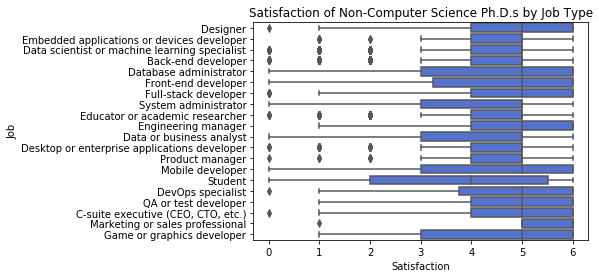

In [139]:
sns.boxplot(data=satisfaction, x='Satisfaction', y='Job', color='royalblue')
plt.title('Satisfaction of Non-Computer Science Ph.D.s by Job Type')
plt.show()

For every category, the median job satisfaction was at least 'slightly satisfied'. For the most part, respondents appeared satisfied with their occupation, so I concluded that working in a computer-centric field as a non-Computer Science Ph.D. was still rewarding.

To address the question of salary, I plotted the distribution of salaries in normalized USD for Ph.D.s with and without a Computer Science degree.

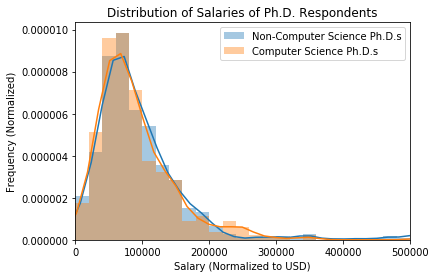

In [138]:
sns.distplot(
    df.loc[is_phd & ~is_compsci & is_employed, ('ConvertedSalary',)].dropna(), 
    bins = 100, kde=True, norm_hist=True, label='Non-Computer Science Ph.D.s'
)
sns.distplot(
    df.loc[is_phd & is_compsci & is_employed, ('ConvertedSalary',)].dropna(), 
    bins = 100, kde=True, norm_hist=True, label='Computer Science Ph.D.s'
)
plt.xlim(0, 500000)
plt.legend()
plt.title('Distribution of Salaries of Ph.D. Respondents')
plt.xlabel('Salary (Normalized to USD)')
plt.ylabel('Frequency (Normalized)')
plt.show()

The distributions seemed to be nearly identical. The one difference was a small sub-population of Computer Science Ph.D.s that made $225k-$250k per year that was missing in the non-Computer Science Ph.D. distribution. From these data, I concluded that there was likely little negative consequence of entering a computer-centric field without a Computer Science degree as a Ph.D.

## Preparing the Data

If the lack of a Computer Science degree did not seem to negatively impact job satisfaction or salary as a Ph.D., what were the factors that made the most difference in determining salary? I wanted to ask this question as a matter of general interest and also to double check that having a Computer Science degree was not a heavily-weighted factor in determining salary.  

To perform the analysis, I wanted to use a machine learning algorithm to predict salary from features that were objective. I decided to remove features that asked for a developer's subjective opinion. The features I chose are listed below. 

In [157]:
df = pd.read_csv(csv_path, low_memory=False)
cols = [
    'Country',
    'FormalEducation',
    'UndergradMajor',
    'CompanySize',
    'DevType',
    'YearsCoding',
    'YearsCodingProf',
    'ConvertedSalary',
    'EducationTypes',
    'SelfTaughtTypes',
    'LanguageWorkedWith',
    'DatabaseWorkedWith',
    'PlatformWorkedWith',
    'FrameworkWorkedWith',
    'HoursComputer',
    'HoursOutside',
    'Exercise',
    'Gender',
    'SexualOrientation',
    'EducationParents',
    'RaceEthnicity',
    'Age',
    'Dependents',
]

df = df[cols]

I then had to clean the data to prepare it for modeling. First, I inspected the missing values in the dataset. 

In [158]:
df.isnull().sum() / df.shape[0]

Country                0.004168
FormalEducation        0.042001
UndergradMajor         0.200486
CompanySize            0.276405
DevType                0.068353
YearsCoding            0.050781
YearsCodingProf        0.211947
ConvertedSalary        0.517455
EducationTypes         0.312528
SelfTaughtTypes        0.419817
LanguageWorkedWith     0.207587
DatabaseWorkedWith     0.329624
PlatformWorkedWith     0.332366
FrameworkWorkedWith    0.477821
HoursComputer          0.270315
HoursOutside           0.271418
Exercise               0.270568
Gender                 0.347843
SexualOrientation      0.395428
EducationParents       0.374710
RaceEthnicity          0.418613
Age                    0.346781
Dependents             0.366790
dtype: float64

Some features were missing up to half of their values --  notably ConvertedSalary, which was my target for the machine learning task. I first dropped all records that were missing a ConvertedSalary value, and I also dropped all records that were completely missing values.

In [159]:
df = df.dropna(axis=0, how='any', subset=['ConvertedSalary'])
df = df.dropna(axis=0, how='all')
df = df.reset_index()
df.shape

(47702, 24)

The intial clearning step trimmed the dataset down to ~47k records. I reinspected the missing values in the dataset.

In [160]:
df.isnull().sum() / df.shape[0]

index                  0.000000
Country                0.000000
FormalEducation        0.014549
UndergradMajor         0.111505
CompanySize            0.141336
DevType                0.007065
YearsCoding            0.000398
YearsCodingProf        0.015450
ConvertedSalary        0.000000
EducationTypes         0.038845
SelfTaughtTypes        0.155926
LanguageWorkedWith     0.025575
DatabaseWorkedWith     0.149134
PlatformWorkedWith     0.153558
FrameworkWorkedWith    0.316486
HoursComputer          0.036015
HoursOutside           0.037147
Exercise               0.035575
Gender                 0.066475
SexualOrientation      0.110310
EducationParents       0.089430
RaceEthnicity          0.136053
Age                    0.060060
Dependents             0.076999
dtype: float64

Other than FrameworkWorkedWith, all the features had 15% or less missing values, which seemed reasonable for a cursory modeling attempt.  

I next went through the features individually to inspect and clean them.

### 1. Country 

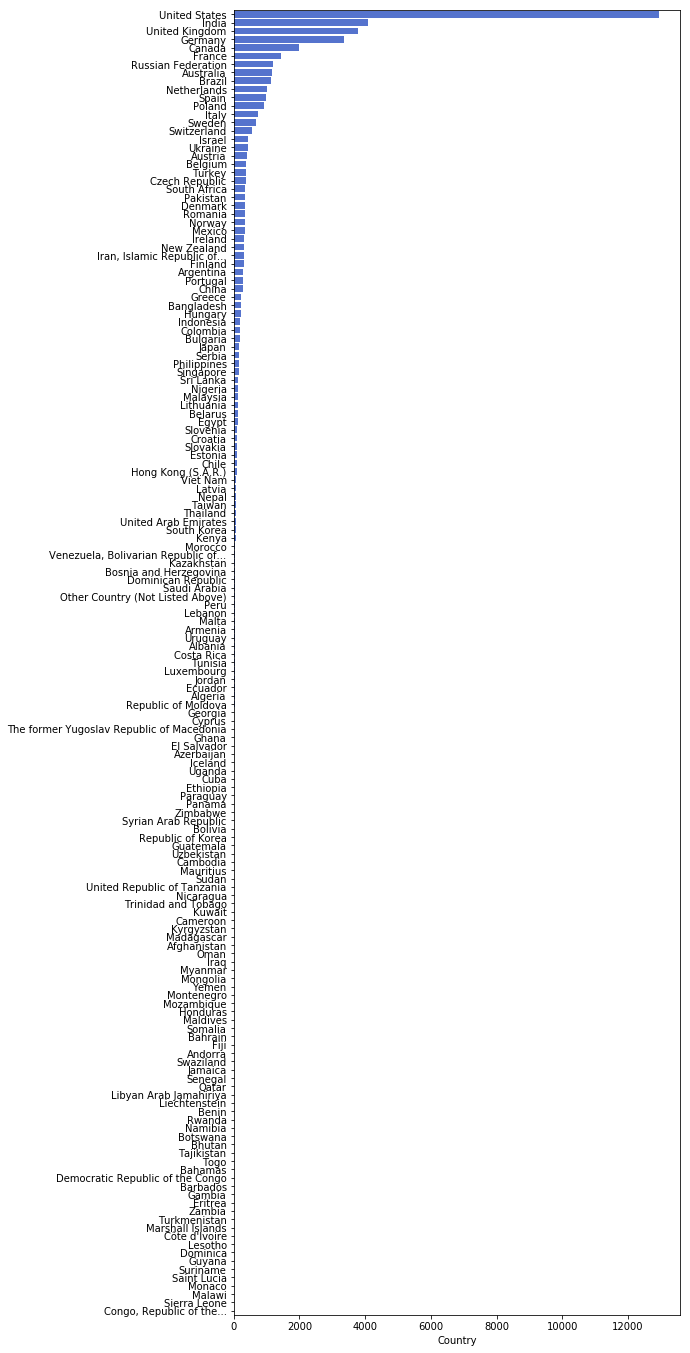

In [161]:
plt.figure(figsize=(8, 24))
sns.barplot(x=df.Country.value_counts(), y=df.Country.value_counts().index, color='royalblue')
plt.show()

The Country feature contained many categories, although many of them were only represented by a single respondent. To one-hot-encode this feature would have significantly expanded the number of features - many of which would have added little value. I decided to establish a cut-off and categorize all countries containing a number of respondents less than this threshold as 'other'. I used China's number of repondents to establish a neighborhood for the threshold. 

In [163]:
df.Country.value_counts()['China']

270

I then set the threhold slightly lower than this, and I lumped all countries beneath the threshold together.

In [164]:
country_counts = df.Country.value_counts()
low_rep_countries = list(country_counts[country_counts < 250].index)

In [165]:
df.loc[df.Country.isin(low_rep_countries), 'Country'] = 'other'

I one-hot-encoded the Country feature and dropped the original textual data.

In [ ]:
one_hot_countries = pd.get_dummies(df.Country, prefix='Country').head()
df = pd.concat([df, one_hot_countries], axis=1)
df = df.drop(columns=['Country'])

### 2. Formal Education  

The next feature I addressed was FormalEducation. Similar to the previous feature, I first plotted the distribution plot of the categories represented.

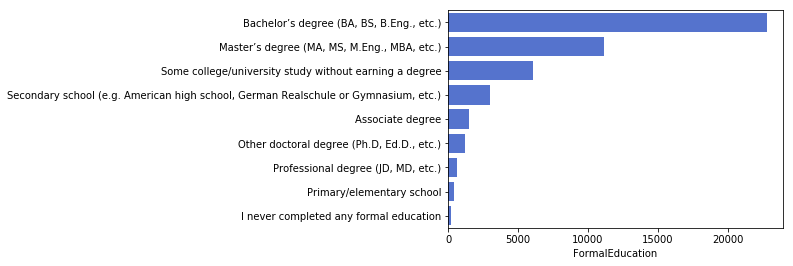

In [167]:
sns.barplot(x=df.FormalEducation.value_counts(), y=df.FormalEducation.value_counts().index, color='royalblue')
plt.show()

I then one-hot-encoded this feature as well.

In [168]:
formal_education = pd.get_dummies(df.FormalEducation, prefix='FormalEducation')
df = pd.concat([df, formal_education], axis=1)
df = df.drop(columns=['FormalEducation'])

### 3. Undergrad Major 

UndergradMajor received a similar treatment as the first two features.

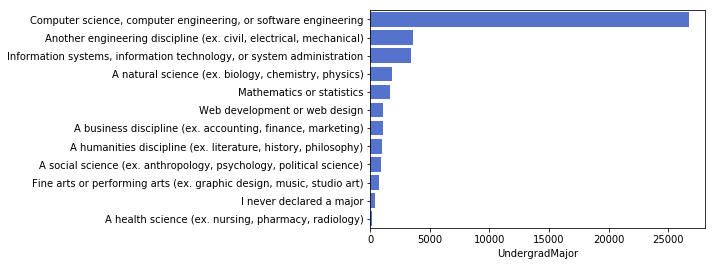

In [169]:
sns.barplot(x=df.UndergradMajor.value_counts(), y=df.UndergradMajor.value_counts().index, color='royalblue')
plt.show()

In [170]:
undergrad = pd.get_dummies(df.UndergradMajor, prefix='UndergradMajor')
df = pd.concat([df, undergrad], axis=1)
df = df.drop(columns=['UndergradMajor'])

### 4. Company Size 

CompanySize was the first feature I addressed that was ordinal. Each of the possible categories corresponded to a certain range of values. 

In [171]:
pprint(list(df.CompanySize.unique()))

['10,000 or more employees',
 '10 to 19 employees',
 '100 to 499 employees',
 '20 to 99 employees',
 '1,000 to 4,999 employees',
 '500 to 999 employees',
 '5,000 to 9,999 employees',
 'Fewer than 10 employees',
 nan]


I decided to take the minimum of each range and use this value for each record. In this way, an approximation of the magnitude of a certain response was captured. I also dealt with missing values by replacing them with the median value.

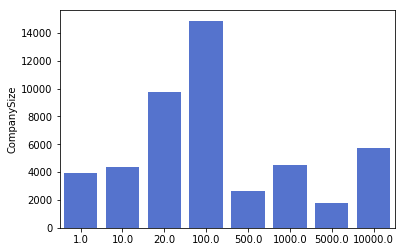

In [172]:
company_size_mapping = {
    'Fewer than 10 employees': 1,
    '10 to 19 employees': 10,
    '20 to 99 employees': 20,
    '100 to 499 employees': 100,
    '500 to 999 employees': 500,
    '1,000 to 4,999 employees': 1000,
    '5,000 to 9,999 employees': 5000,
    '10,000 or more employees': 10000,
    np.nan: np.nan,
}

company_size = df.CompanySize.map(company_size_mapping)
company_size = company_size.fillna(company_size.median())

sns.barplot(x=company_size.value_counts().index, y=company_size.value_counts(), color='royalblue')
plt.show()

### 5. Years Coding 

Like the previous feature, YearsCoding was an ordinal feature.

In [173]:
pprint(list(df.YearsCoding.unique()))

['30 or more years',
 '6-8 years',
 '9-11 years',
 '0-2 years',
 '15-17 years',
 '18-20 years',
 '3-5 years',
 '12-14 years',
 '24-26 years',
 '21-23 years',
 '27-29 years',
 nan]


I adopted the same policy as above and translated each entry into the minimum value of its corresponding range. Again, I filled in missing values with the feature median.

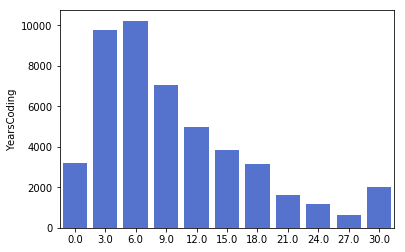

In [174]:
years_coding_mapping = {
    '0-2 years': 0,
    '3-5 years': 3,
    '6-8 years': 6,
    '9-11 years': 9,
    '12-14 years': 12,
    '15-17 years': 15,
    '18-20 years': 18,
    '21-23 years':21,
    '24-26 years': 24,
    '27-29 years': 27,
    '30 or more years': 30,
    np.nan: np.nan,
}

years_coding = df.YearsCoding.map(years_coding_mapping)
years_coding = years_coding.fillna(years_coding.median())

sns.barplot(x=years_coding.value_counts().index, y=years_coding.value_counts(), color='royalblue')
plt.show()

### 6. Years Coding Professionally 

This feature was cleaned similary to YearsCoding.

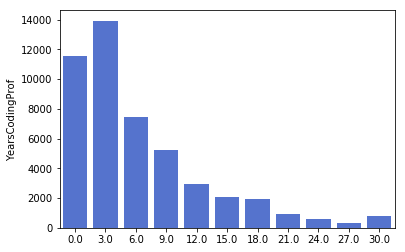

In [175]:
years_coding_prof = df.YearsCodingProf.map(years_coding_mapping)
years_coding_prof = years_coding_prof.fillna(years_coding_prof.median())

sns.barplot(x=years_coding_prof.value_counts().index, y=years_coding_prof.value_counts(), color='royalblue')
plt.show()

### 7. Education Types 

EducationTypes was the first feature encountered during data preparation that could have multiple answers per respondent. To one-hot-encode this feature and others like it, I created a class and function that could be re-used on other features.

In [176]:
class DefaultEntry:
    """Default record for a dictionary or DataFrame
    
    Attributes
    ----------
    _keys : list
        Keys (or column names) in the collection
    _default_value : int
        The default value to assign to each key
    _row_dict : dict
        key, default value pairs for one default record
    """
    
    def __init__(self, keys, default_value=0):
        """Instantiate object
        
        keys : list
            Keys (or column names) in the collection
        default_value : int, optional
            The default value to assign to each key
        """
        self._keys = keys
        self._default_value = default_value
        self._row_dict = {key: default_value for key in keys}
        
    def to_dict(self):
        return self._row_dict

    def to_df(self):
        return pd.DataFrame(self._row_dict)
    

def expand_col(col, prefix=''):
    """For a column that can be a multi-category answer, break into constituent answers
    
    Parameters
    ----------
    col : pandas.Series
        The column to be processed
    prefix : str, optional
        Prefix to prepend to each category name
        
    Returns
    -------
    pd.DataFrame
        The expanded column
    """
    
    unique_categories = set()
    for entry in col:
        if entry is np.nan:
            pass
        else:
            unique_categories.update(entry.split(';'))
            
    new_cols = []
    for entry in col:
        if entry is np.nan:
            new_cols.append(DefaultEntry(unique_categories).to_dict())
        else:
            new_entry = DefaultEntry(unique_categories).to_dict()
            new_entry.update(dict(Counter(entry.split(';'))))
            new_cols.append(new_entry)

    new_cols = pd.DataFrame(new_cols)
    if prefix:
        new_cols.columns = [prefix + "_" + name for name in new_cols.columns]
    
    return new_cols

I expanded the column, visualized the prevalence of each category, and then dropped the original feature.

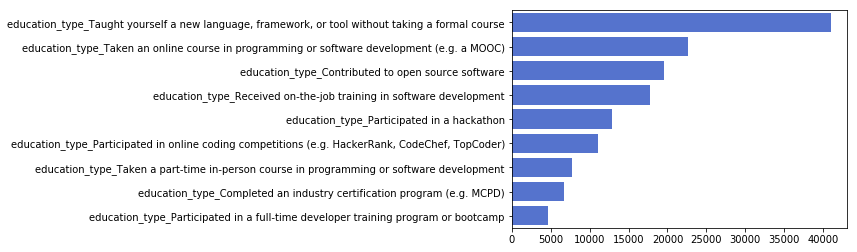

In [177]:
education_types = expand_col(df.EducationTypes, "education_type")
education_types_summary = education_types.sum().sort_values(ascending=False)
sns.barplot(x=education_types_summary, y=education_types_summary.index, color='royalblue')
plt.show()

In [178]:
df = pd.concat([df, education_types], axis=1)
df = df.drop(columns=['EducationTypes'])

### 8. Self Taught Types 

This features was handled the same as EducationTypes.

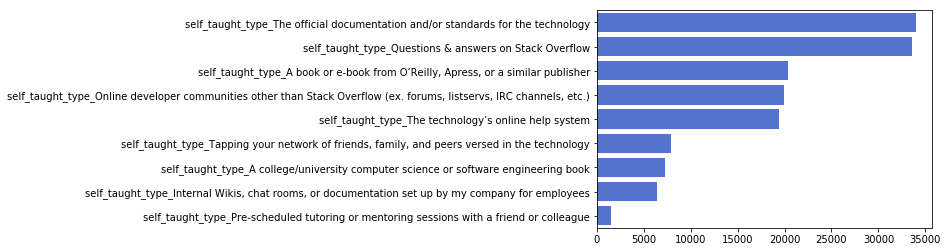

In [179]:
self_taught_types = expand_col(df.SelfTaughtTypes, prefix="self_taught_type")
self_taught_summary = self_taught_types.sum().sort_values(ascending=False)
sns.barplot(x=self_taught_summary, y=self_taught_summary.index, color='royalblue')
plt.show()

In [180]:
df = pd.concat([df, self_taught_types], axis=1)
df = df.drop(columns=['SelfTaughtTypes'])

### 9. Languages Worked With 

Earlier, I established that Python, Bash, HTML, and SQL were the most commonly used languages amongst non-Computer Science Ph.D.s. The LanguagesWorkedWith column was expanded, and the results were different.

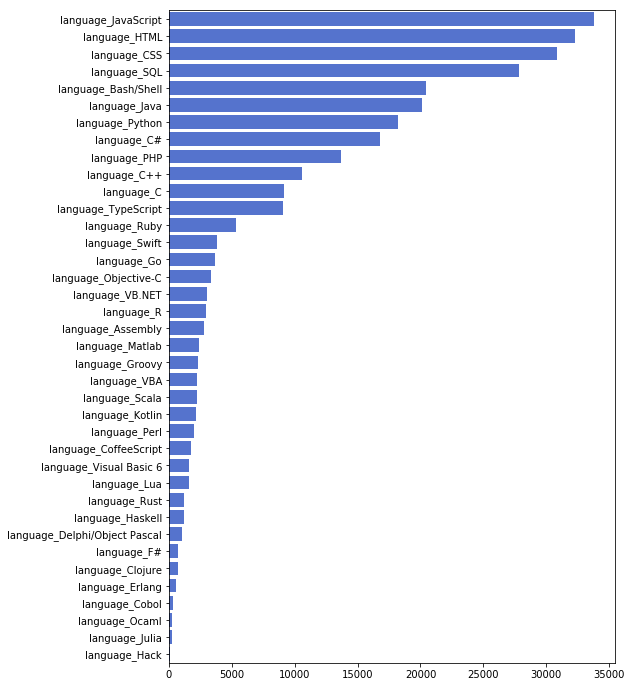

In [181]:
languages = expand_col(df.LanguageWorkedWith, prefix="language")
languages_summary = languages.sum().sort_values(ascending=False)
plt.figure(figsize=(8, 12))
sns.barplot(x=languages_summary, y=languages_summary.index, color='royalblue')
plt.show()

Languages for web development were more prevelant when looking at the current dataset.

In [182]:
df = pd.concat([df, languages], axis=1)
df = df.drop(columns=['LanguageWorkedWith'])

### 10. Databases 

The next couple features all represent different tools that developers use, and they were all handled similarly to the LanguagesWorkedWith feature.

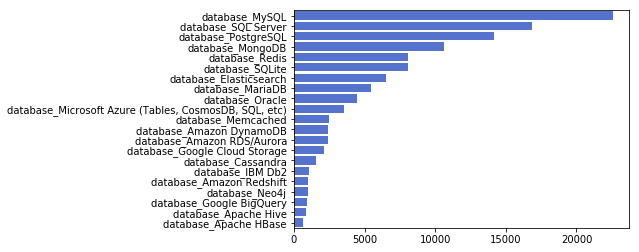

In [183]:
databases = expand_col(df.DatabaseWorkedWith, prefix='database')
databases_summary = databases.sum().sort_values(ascending=False)
sns.barplot(x=databases_summary, y=databases_summary.index, color='royalblue')
plt.show()

In [184]:
df = pd.concat([df, databases], axis=1)
df = df.drop(columns=['DatabaseWorkedWith'])

### 11. Platforms Worked With

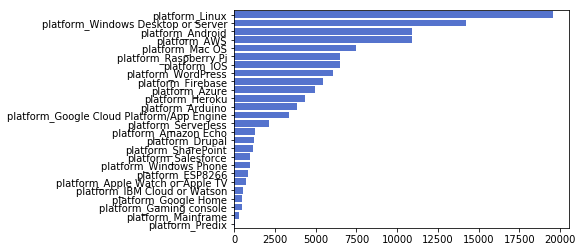

In [185]:
platforms = expand_col(df.PlatformWorkedWith, prefix='platform')
platforms_summary = platforms.sum().sort_values(ascending=False)
sns.barplot(x=platforms_summary, y=platforms_summary.index, color='royalblue')
plt.show()

In [186]:
df = pd.concat([df, platforms], axis=1)
df = df.drop(columns=['PlatformWorkedWith'])

### 12. Hours on Computer 

The HoursComputer feature received the standard treatment for an ordinal feature. 

>From this point on, all cleaning methods had been established for categorical and ordinal features and for features with multiple answers. Hence, the remainder of the data preparation was not commented on. 

In [187]:
pprint(list(df.HoursComputer.unique()))

['5 - 8 hours',
 'Over 12 hours',
 '9 - 12 hours',
 '1 - 4 hours',
 nan,
 'Less than 1 hour']


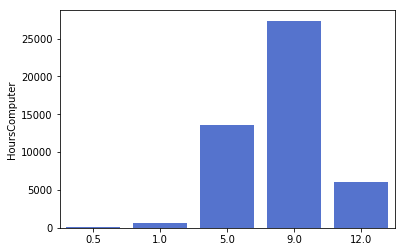

In [188]:
hours_computer_mapping = {
    'Less than 1 hour': 0.5,
    '1 - 4 hours': 1,
    '5 - 8 hours': 5,
    '9 - 12 hours': 9,
    'Over 12 hours': 12,
    np.nan: np.nan,
}

hours_computer = df.HoursComputer.map(hours_computer_mapping)
hours_computer = hours_computer.fillna(hours_computer.median())

sns.barplot(x=hours_computer.value_counts().index, y=hours_computer.value_counts(), color='royalblue')
plt.show()

### 13. Hours Outside

In [189]:
pprint(list(df.HoursOutside.unique()))

['30 - 59 minutes',
 '1 - 2 hours',
 'Less than 30 minutes',
 '3 - 4 hours',
 'Over 4 hours',
 nan]


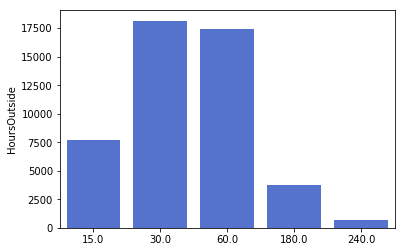

In [190]:
hours_outside_mapping = {
    'Less than 30 minutes': 15,
    '30 - 59 minutes': 30,
    '1 - 2 hours': 60,
    '3 - 4 hours': 180,
    'Over 4 hours': 240,
    np.nan: np.nan,
}

hours_outside = df.HoursOutside.map(hours_outside_mapping)
hours_outside = hours_outside.fillna(hours_outside.median())

sns.barplot(x=hours_outside.value_counts().index, y=hours_outside.value_counts(), color='royalblue')
plt.show()

### 14. Exercise

In [191]:
pprint(list(df.Exercise.unique()))

['Daily or almost every day',
 '3 - 4 times per week',
 '1 - 2 times per week',
 "I don't typically exercise",
 nan]


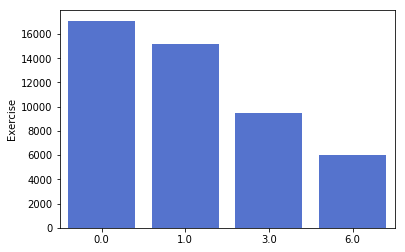

In [192]:
exercise_mapping = {
    "I don't typically exercise": 0,
    '1 - 2 times per week': 1,
    '3 - 4 times per week': 3,
    'Daily or almost every day': 6,
     np.nan: np.nan,
}

exercise = df.Exercise.map(exercise_mapping)
exercise = exercise.fillna(exercise.median())

sns.barplot(x=exercise.value_counts().index, y=exercise.value_counts(), color='royalblue')
plt.show()

### 15. Gender

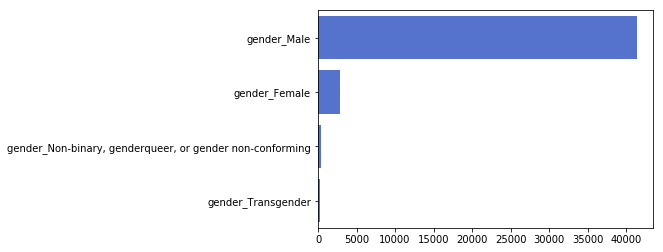

In [193]:
gender = expand_col(df.Gender, prefix='gender')
gender_summary = gender.sum().sort_values(ascending=False)
sns.barplot(x=gender_summary, y=gender_summary.index, color='royalblue')
plt.show()

In [194]:
df = pd.concat([df, gender], axis=1)
df = df.drop(columns=['Gender'])

### 16. Sexual Orientation

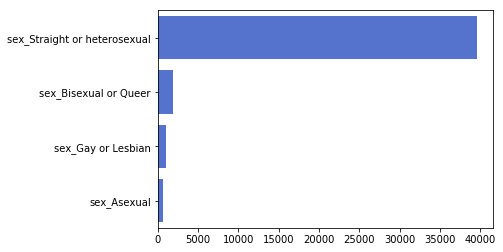

In [195]:
sex = expand_col(df.SexualOrientation, prefix='sex')
sex_summary = sex.sum().sort_values(ascending=False)
sns.barplot(x=sex_summary, y=sex_summary.index, color='royalblue')
plt.show()

In [196]:
df = pd.concat([df, sex], axis=1)
df = df.drop(columns=['SexualOrientation'])

### 17. Parents' Education

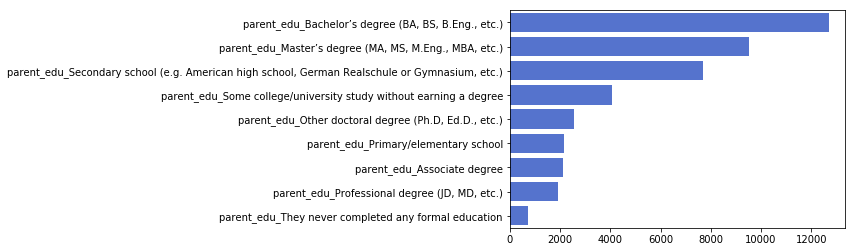

In [197]:
parents = expand_col(df.EducationParents, prefix='parent_edu')
parents_summary = parents.sum().sort_values(ascending=False)
sns.barplot(x=parents_summary, y=parents_summary.index, color='royalblue')
plt.show()

In [198]:
df = pd.concat([df, parents], axis=1)
df = df.drop(columns=['EducationParents'])

### 18. Race

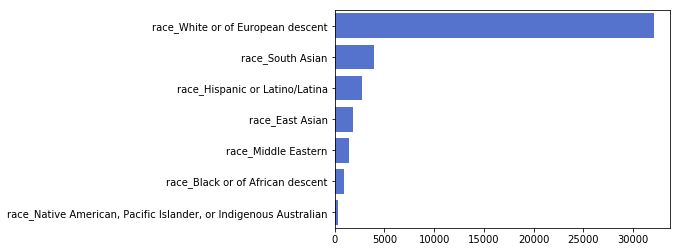

In [199]:
race = expand_col(df.RaceEthnicity, prefix='race')
race_summary = race.sum().sort_values(ascending=False)
sns.barplot(x=race_summary, y=race_summary.index, color='royalblue')
plt.show()

In [200]:
df = pd.concat([df, race], axis=1)
df = df.drop(columns=["RaceEthnicity"])

### 19. Age

In [202]:
pprint(list(df.Age.unique()))

['35 - 44 years old',
 '18 - 24 years old',
 '25 - 34 years old',
 '45 - 54 years old',
 nan,
 '55 - 64 years old',
 'Under 18 years old',
 '65 years or older']


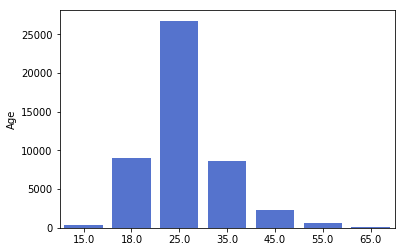

In [203]:
age_mapping = {
    'Under 18 years old': 15,
    '18 - 24 years old': 18,
    '25 - 34 years old': 25,
    '35 - 44 years old': 35,
    '45 - 54 years old': 45,
    '55 - 64 years old': 55,
    '65 years or older': 65,
    np.nan: np.nan, 
}

age = df.Age.map(age_mapping)
age = age.fillna(age.median())

sns.barplot(x=age.value_counts().index, y=age.value_counts(), color='royalblue')
plt.show()

In [204]:
df.Age = age

### 20. Dependents

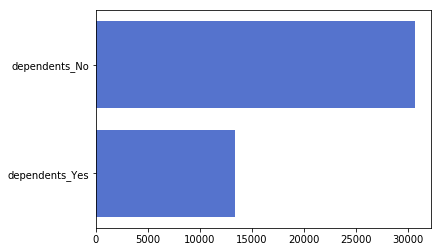

In [205]:
dependents = expand_col(df.Dependents, prefix='dependents')
dependents_summary = dependents.sum().sort_values(ascending=False)
sns.barplot(x=dependents_summary, y=dependents_summary.index, color='royalblue')
plt.show()

In [206]:
df = pd.concat([df, dependents], axis=1)
df = df.drop(columns=['Dependents'])

In [119]:
def plot_cat_feature_dist(data, sorted_index, title, xlabel, color):
    dist = data.value_counts(dropna=False)
    dist_index = dist.index.fillna('Not reported')
    dist = dist.reindex(sorted_index)
    
    g = sns.barplot(x=dist.index, y=dist, color=color)
    
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    
    return g

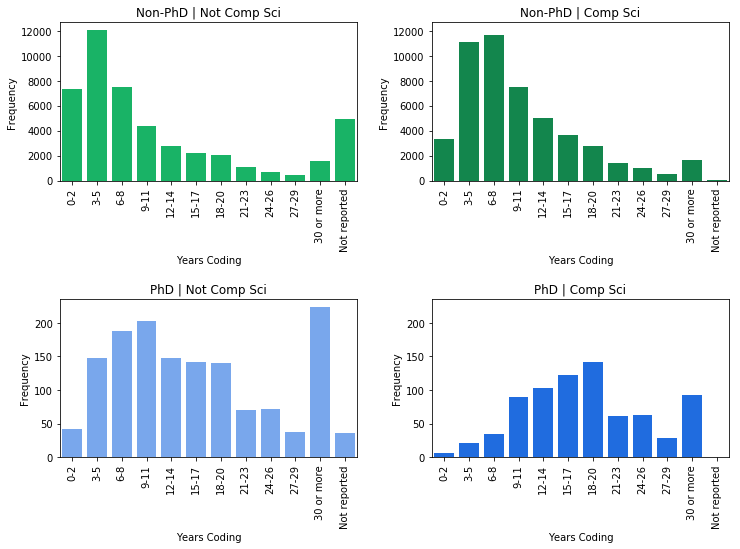

In [75]:
years_coding_df = df.YearsCoding.str.replace(' years', '').replace(np.nan, 'Not reported')

coding_index = [
        '0-2',
        '3-5',
        '6-8',
        '9-11',
        '12-14',
        '15-17',
        '18-20',
        '21-23',
        '24-26',
        '27-29',
        '30 or more',
        'Not reported',
]


plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.75)

plt.subplot(221)
ax1 = plot_cat_feature_dist(
          years_coding_df[~is_compsci & ~is_phd], 
          sorted_index=coding_index, 
          title='Non-PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#00cc66')

plt.subplot(222, sharey=ax1)
ax2 = plot_cat_feature_dist(
          years_coding_df[is_compsci & ~is_phd], 
          sorted_index=coding_index, 
          title='Non-PhD | Comp Sci',
          xlabel='Years Coding',
          color='#00994d')

plt.subplot(223)
ax3 = plot_cat_feature_dist(
          years_coding_df[~is_compsci & is_phd], 
          sorted_index=coding_index, 
          title='PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#66a3ff')

plt.subplot(224, sharey=ax3)
ax4 = plot_cat_feature_dist(
          years_coding_df[is_compsci & is_phd], 
          sorted_index=coding_index, 
          title='PhD | Comp Sci',
          xlabel='Years Coding',
          color='#0066ff')

plt.show()

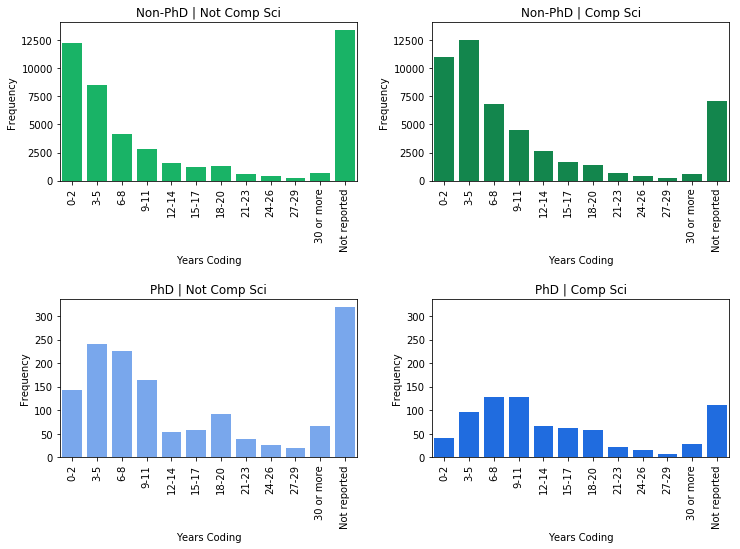

In [76]:
prof_years_coding_df = df.YearsCodingProf.str.replace(' years', '').replace(np.nan, 'Not reported')

prof_coding_index = [
        '0-2',
        '3-5',
        '6-8',
        '9-11',
        '12-14',
        '15-17',
        '18-20',
        '21-23',
        '24-26',
        '27-29',
        '30 or more',
        'Not reported',
]


plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.75)

plt.subplot(221)
ax1 = plot_cat_feature_dist(
          prof_years_coding_df[~is_compsci & ~is_phd], 
          sorted_index=prof_coding_index, 
          title='Non-PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#00cc66')

plt.subplot(222, sharey=ax1)
ax2 = plot_cat_feature_dist(
          prof_years_coding_df[is_compsci & ~is_phd], 
          sorted_index=prof_coding_index, 
          title='Non-PhD | Comp Sci',
          xlabel='Years Coding',
          color='#00994d')

plt.subplot(223)
ax3 = plot_cat_feature_dist(
          prof_years_coding_df[~is_compsci & is_phd], 
          sorted_index=prof_coding_index, 
          title='PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#66a3ff')

plt.subplot(224, sharey=ax3)
ax4 = plot_cat_feature_dist(
          prof_years_coding_df[is_compsci & is_phd], 
          sorted_index=prof_coding_index, 
          title='PhD | Comp Sci',
          xlabel='Years Coding',
          color='#0066ff')

plt.show()

## Acknowledgments

[1] Sharon Soussan https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values